# Plotting Couchbase gets vs sets
sjdillon

### First, I saved some sample data to a file - cb_data/gets.csv, let's look at the first few lines

In [1]:
!head cb_data/gets.csv

2018-07-19 13:13:00,24.29090401255186
2018-07-19 13:14:00,22.53517612966766
2018-07-19 13:15:00,22.02520875209262
2018-07-19 13:16:00,32.89054249081126
2018-07-19 13:17:00,21.55546966666391
2018-07-19 13:18:00,17.70514047660862
2018-07-19 13:19:00,13.22833833892199
2018-07-19 13:20:00,18.30867092679628
2018-07-19 13:21:00,21.44578424639375
2018-07-19 13:22:00,23.11689317433427


### Now import the python modules we'll use to process the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### and we should create a format string for the raw date data in the csv

In [3]:
fmt = '%Y-%m-%d %H:%M:%S'

### now we can load the csv into a couple arrays so we can plot

In [4]:
dt, gets = np.loadtxt("cb_data/gets.csv", delimiter=',',
                      unpack=True,
                      converters={ 0: mdates.strpdate2num(fmt)})

### I'm curious, let's check the datatypes of those vars

In [5]:
print type(dt), type(gets)

<type 'numpy.ndarray'> <type 'numpy.ndarray'>


### Now we plot the data

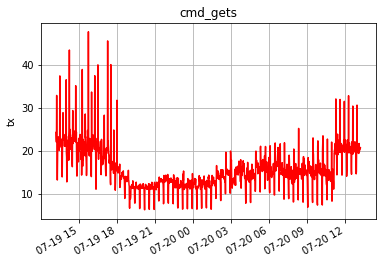

In [6]:
plt.plot_date(x=dt, y=gets, fmt="r-")
plt.title('cmd_gets')
plt.ylabel('tx')
plt.grid(True)
# autoformat the y axis date for easy reading
fig = plt.figure(1)
fig.autofmt_xdate()
plt.show()

### But line charts are best when we compare two lines
### Let's add another one

### How about we reverse the gets numbers for sample second line?

In [7]:
rgets = gets[::-1]

### This new line will be blue

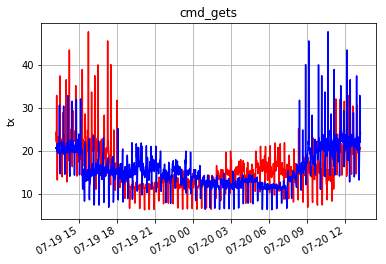

In [8]:
plt.plot_date(x=dt, y=gets, fmt="r-")
plt.plot_date(x=dt, y=rgets, fmt="b-")
plt.title('cmd_gets')
plt.ylabel('tx')
plt.grid(True)
# autoformat the y axis date for easy reading
fig = plt.figure(1)
fig.autofmt_xdate()
plt.show()

### So that works, but we need useful data.
### Let's plot gets over sets.

### Here's the raw data from the csv

In [9]:
!head cb_data/sets.csv

2018-07-19 13:13:00,1.190811390145634
2018-07-19 13:14:00,0.4054119897147119
2018-07-19 13:15:00,0.7089640159998343
2018-07-19 13:16:00,6.025432900432901
2018-07-19 13:17:00,0.875
2018-07-19 13:18:00,1.052464008859358
2018-07-19 13:19:00,0.4821071785357499
2018-07-19 13:20:00,0.734304932735426
2018-07-19 13:21:00,0.5178571428571429
2018-07-19 13:22:00,0.7869139641047794


### load the sets data

In [10]:
dt1, sets = np.loadtxt("cb_data/sets.csv", delimiter=',',
                      unpack=True,
                      converters={ 0: mdates.strpdate2num(fmt)})

### plot it to check

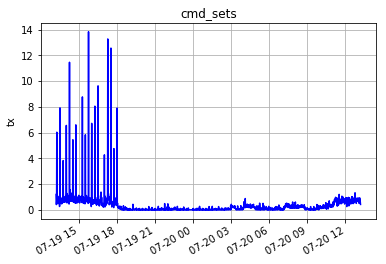

In [11]:
plt.plot_date(x=dt1, y=sets, fmt="b-")
plt.title('cmd_sets')
plt.ylabel('tx')
plt.grid(True)
# autoformat the y axis date for easy reading
fig = plt.figure(1)
fig.autofmt_xdate()
plt.show()

### Now here is comparing gets and sets, this is something you cannot do in the Couchbase console

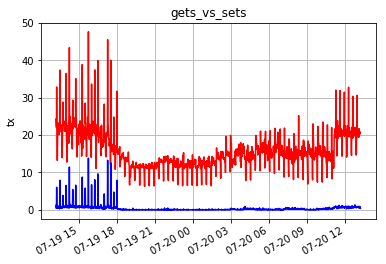

In [12]:
plt.plot_date(x=dt, y=gets, fmt="r-")
plt.plot_date(x=dt1, y=sets, fmt="b-")
plt.title('gets_vs_sets')
plt.ylabel('tx')
plt.grid(True)
# autoformat the y axis date for easy reading
fig = plt.figure(1)
fig.autofmt_xdate() 
plt.show()